# Clustering and PCA

__Assignment Submitted By:__ Janarthanan B (jnvdasa@gmail.com)



__Client:__ HELP International (an international humanitarian NGO committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities)

__Business Question:__ How to use the $ 10 million funds raised effectively by choosing countries that are in the direst need of aid?

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from matplotlib import colors as mcolors

import warnings, os
import random as rd

In [2]:
%%html
<style> table {float:left} </style>

In [3]:
warnings.filterwarnings('ignore')

data_path = os.getcwd()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

plt.rcParams.update(plt.rcParamsDefault)

## 1. Exploratory Data Analysis (EDA)

In [4]:
df = pd.read_csv(data_path + '\\Country-data.csv', encoding = "ISO-8859-1")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'], dtype='object')

In [7]:
df.shape

(167, 10)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [10]:
df.isnull().sum(axis = 0) # Check for null values

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

__Summary:__ There are 167 rows and 10 columns. There are no null values. All the attributes of the country are expressed as numeric value and there is no need to change the data type. 

__Data Dictionary__

|Column Name|Description|Type|Null|
|:---|:---|:---|:---|
|country|Name of the country|String|None|
|child_mort|Death of children under 5 years of age per 1000 live births|Float|None|
|exports|Exports of goods and services. Given as %age of the Total GDP|Float|None|
|health|Total health spending as %age of Total GDP|Float|None|
|imports|Imports of goods and services. Given as %age of the Total GDP|Float|None|
|Income|Net income per person|Integer|None|
|Inflation|The measurement of the annual growth rate of the Total GDP|Float|None|
|life_expec|The average number of years a new born child would live if the current mortality patterns are to remain the same|Float|None|
|total_fer|The number of children that would be born to each woman if the current age-fertility rates remain the same.|Float|None|
|gdpp|The GDP per capita. Calculated as the Total GDP divided by the total population.|Integer|None|

## 2. Data Visualization - Univariate

In [11]:
%matplotlib inline

In [12]:
columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

### 2.1. Visualizing the Distribution of Data - Box Plot

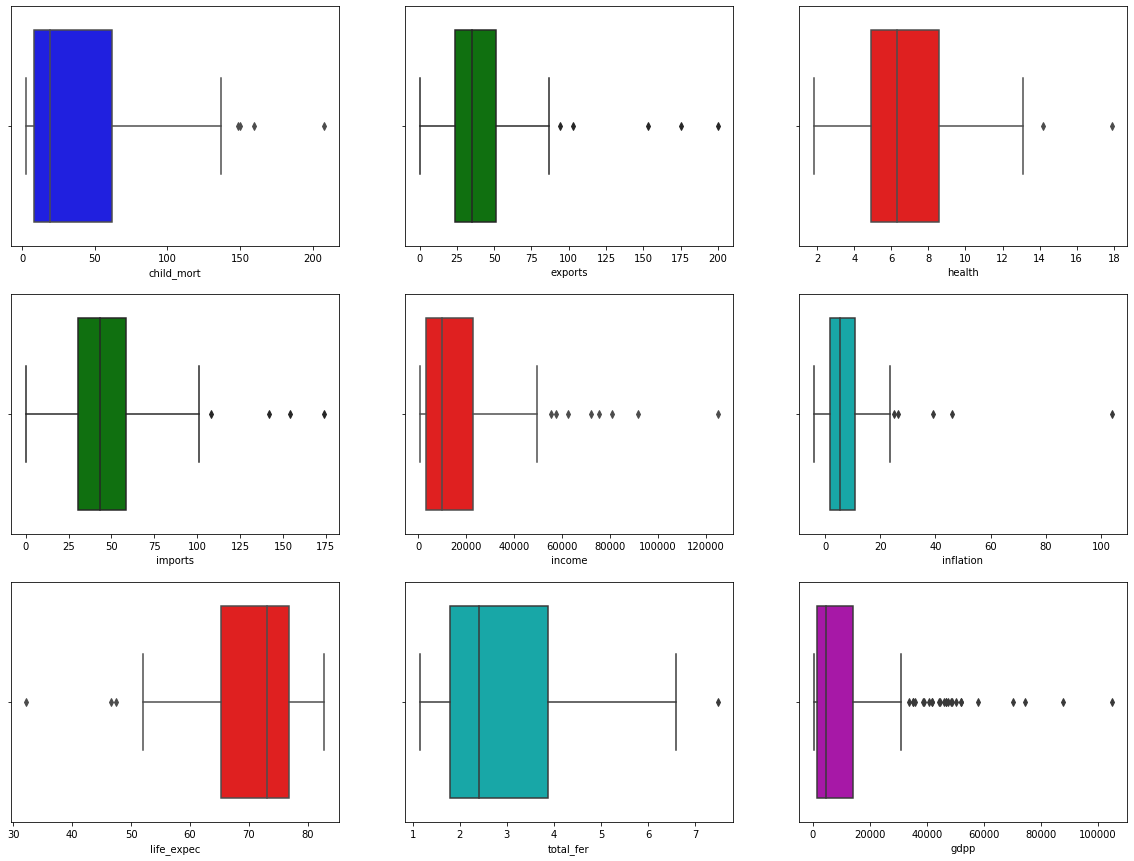

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

i = 0; j = 0; colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for col in columns:

    sns.boxplot(data = df, x = col, ax = axes[i][j], color = colors[(i + j) % 7])
    j = j + 1; 
    if j > 2: j = 0; i = i + 1
        
plt.show()

### 2.2. Visualizing the Distribution of Data - Histogram

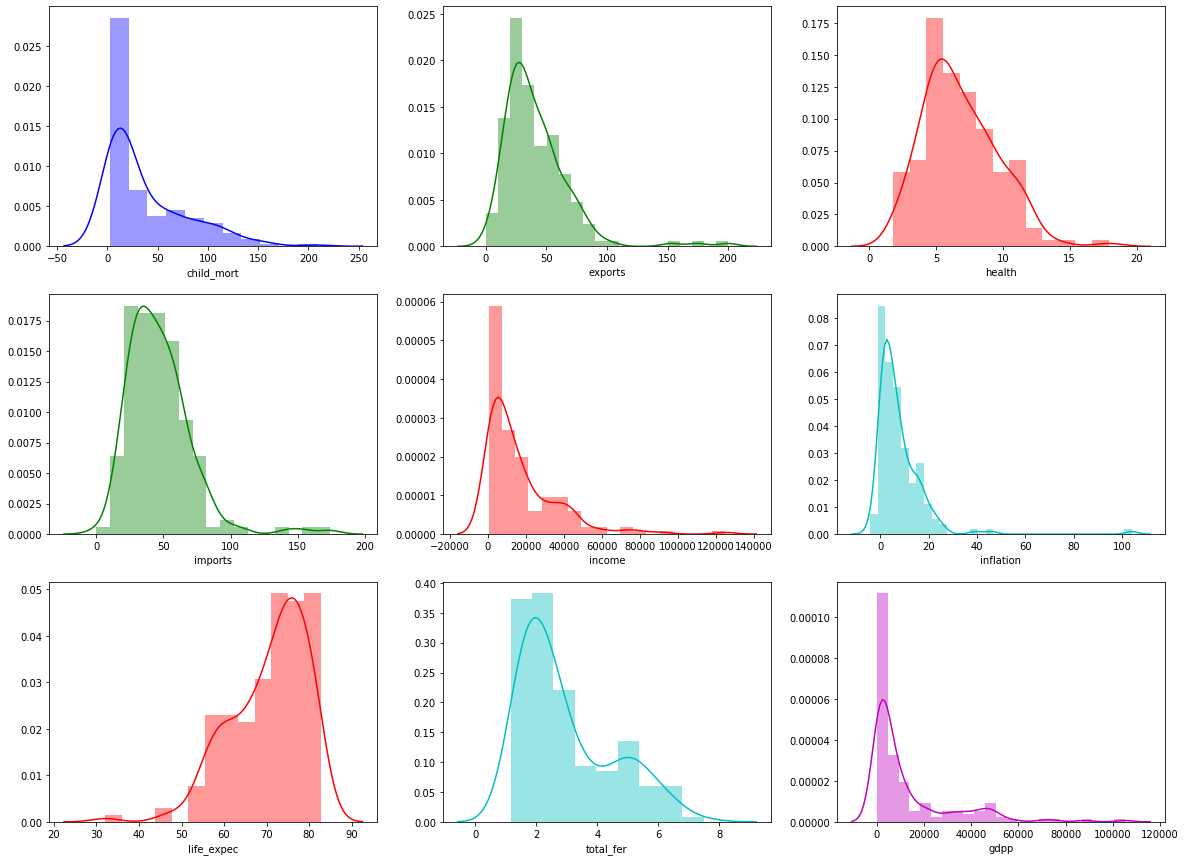

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

i = 0; j = 0; colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for col in columns:

    sns.distplot(df[col], hist = True, ax = axes[i][j], color = colors[(i + j) % 7]) 
    j = j + 1; 
    if j > 2: j = 0; i = i + 1
        
plt.show()  

## 3. Identifying the Outliers

The above visualizations show that there are few outliers and also the distribution is skewed to some extent.

In [15]:
stats = df.describe().T

In [16]:
stats['IQR'] = stats['75%'] - stats['25%']
stats['whisker1'] = round(stats['25%'] - 1.5 * stats['IQR'], 2)
stats['whisker2'] = round(stats['75%'] + 1.5 * stats['IQR'], 2)

In [17]:
for col in columns:
    low   = stats.loc[col, 'whisker1']
    high  = stats.loc[col, 'whisker2']
    outlr = df.loc[(df[col] < low) | (df[col] > high)].shape[0]
    stats.at[col, 'Outliers'] = outlr

In [18]:
stats.loc[round(stats['mean'] - stats['50%'], 0) == 0, 'Skew'] = 'None' 
stats.loc[round(stats['mean'] - stats['50%'], 0) < 0,  'Skew'] = 'Left' 
stats.loc[round(stats['mean'] - stats['50%'], 0) > 0,  'Skew'] = 'Right' 

In [19]:
stats

,count,mean,std,min,25%,50%,75%,max,IQR,whisker1,whisker2,Outliers,Skew
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00,53.850,-72.53,142.88,4.0,Right
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00,27.550,-17.52,92.67,5.0,Right
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90,3.680,-0.60,14.12,2.0,None
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00,28.550,-12.63,101.58,4.0,Right
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00,19445.000,-25812.50,51967.50,8.0,Right
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00,8.940,-11.60,24.16,5.0,Right
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80,11.500,48.05,94.05,3.0,Left
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49,2.085,-1.33,7.01,1.0,Right
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00,12720.000,-17750.00,33130.00,25.0,Right


Except in the case of gdpp, there are very few outliers. Removing these outliers will result in those countries not getting the funds that they deserve. So __we will not remove the outliers.__

## 4. Multicollinearity - Studying the Correlation (Bivariate)

Multicollinearity refers to a situation in which two or more independent variables are highly linearly related. Here, we see that many of the variables are either positively or negatively correlated.

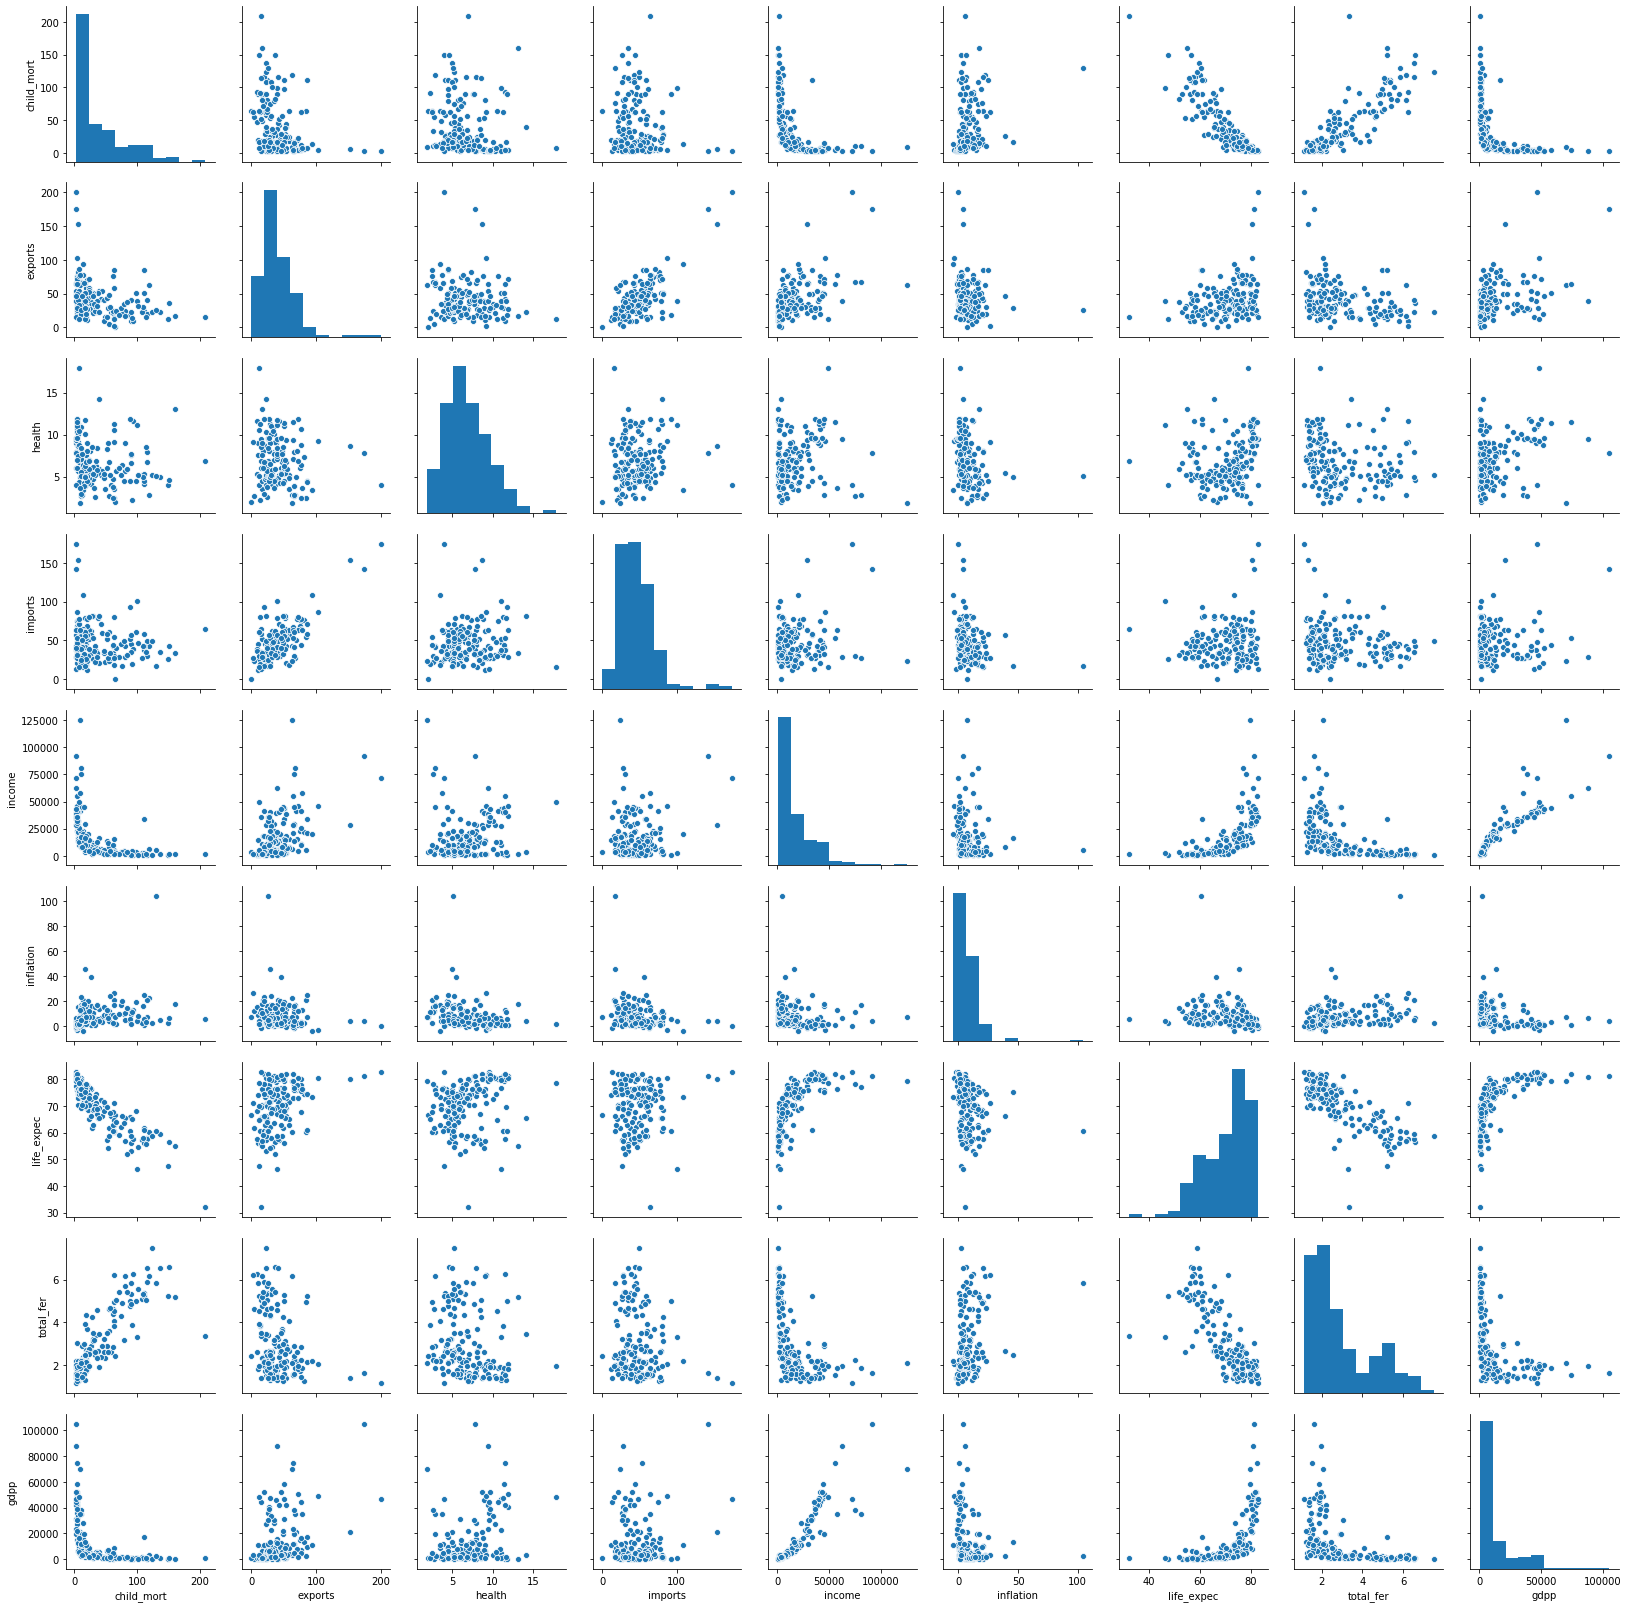

In [20]:
sns.pairplot(df)

In [21]:
dfcorr = df[columns].corr()

In [22]:
dfcorr

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


(9.0, 0.0)

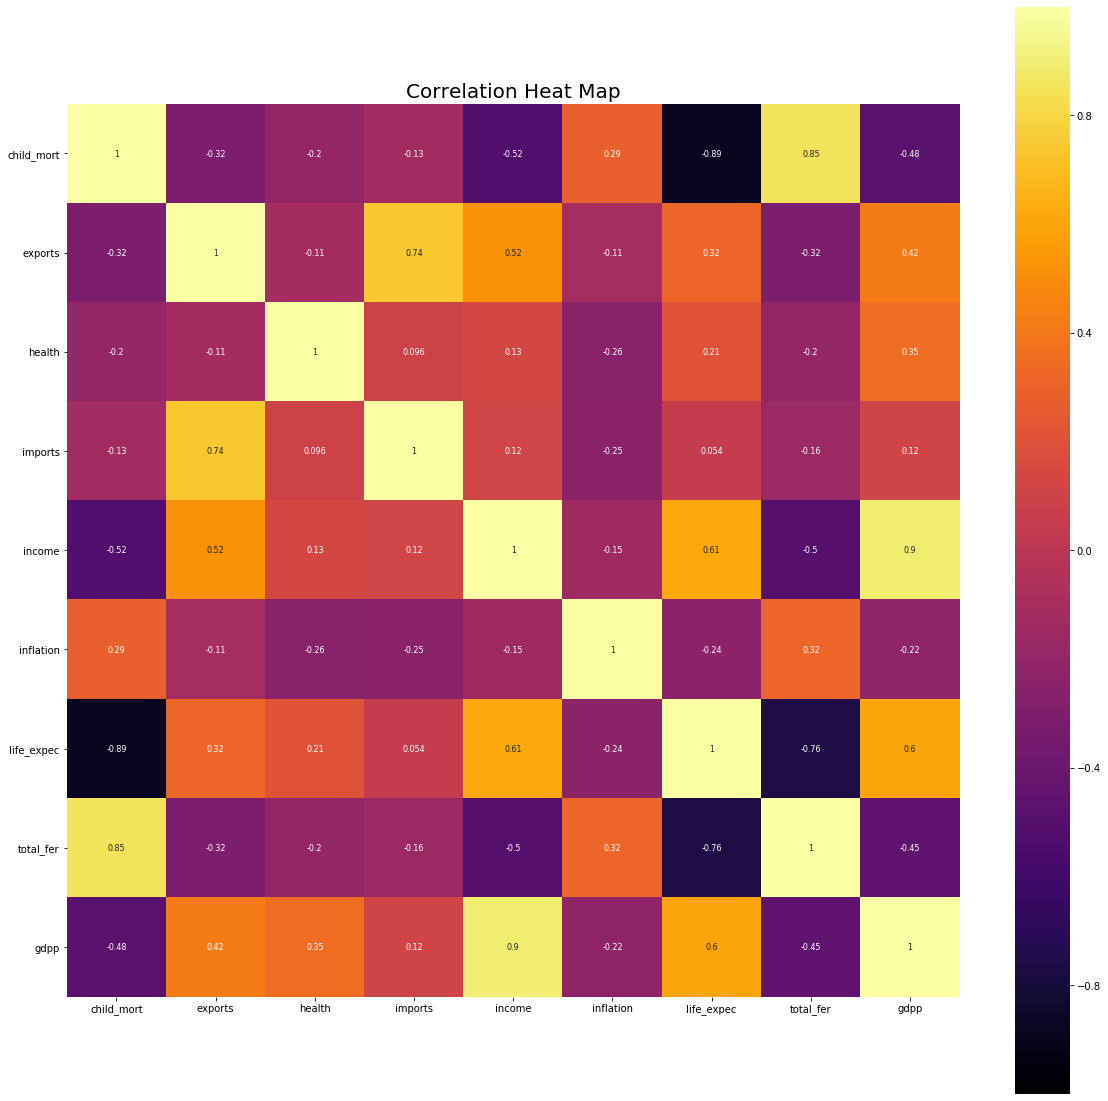

In [23]:
f, ax = plt.subplots(figsize=(20, 20))

heatmap = sns.heatmap(dfcorr, square = True, vmin = -1, vmax = 1,
                      cmap = 'inferno', annot = True, annot_kws = {"size": 8})

# add the column names as labels
ax.set_yticklabels(dfcorr.columns, rotation = 0)
ax.set_xticklabels(dfcorr.columns)

# add title to the plot
ax.set_title('Correlation Heat Map', fontsize = 20)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

# due to a bug in seaborn the first and last row square are getting cut in half - the following code fixes it
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

From the above heat map we can see that:

 - income and gdpp has strong positive correlation
 - child mortality and fertility rate has strong positive correlation
 - both child mortality and fertility rate has strong negative correlation with life expectancy
 - imports and exports has strong positive correlation

Multicollinearity undermines the statistical significance of an independent variable and hence a problem. With PCA, we can avoid the problem of multicollinearity. The principal components are linear combinations of the original variables in such a way as to explain the variance without losing information (i.e. without the need for dropping any columns)

## 5. Principal Component Analysis

Principal component analysis (PCA) is one of the most commonly used techniques for dimensionality reduction i.e. to convert large data sets into smaller ones containing fewer variables which are not correlated with each other and derived as linear combinations of the original variables there by capturing maximum information in the dataset. With PCA we can create uncorrelated features that makes the clustering process faster and more stable. The principal components are linear combination of the original variables and hence we retain much of the information.

### 5.1. Rescaling the Features

It is very important to scale or standardize the variables before we do PCA. There are two methods of scaling:

 - Standardization - (x - mu) / sigma - mu = 0 and sigma = 1
 - Normalization - (x - xmin) / (xmax - xmin) - between -1 and 1

Here we apply standardization.

In [24]:
columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

In [25]:
df_scaled = df[columns]

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
df_scaled[columns] = scaler.fit_transform(df_scaled[columns])

In [29]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### 5.2. Applying PCA on the Data

We have standardized the data by applying the standard scaler. Now we will apply PCA on the data.

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(random_state=42)

In [32]:
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

#### Explained Variance

In [33]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

<BarContainer object of 9 artists>

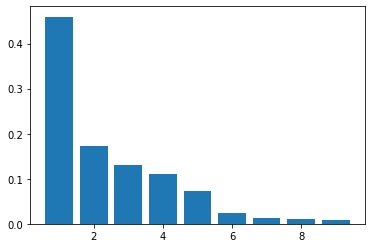

In [34]:
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)

#### PCA Components

In [35]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [36]:
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':df_scaled.columns })

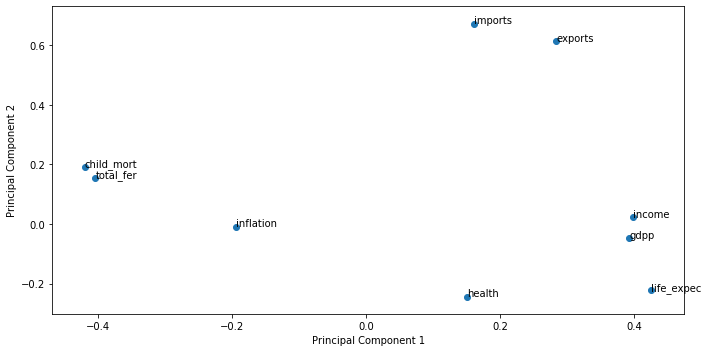

In [37]:
fig = plt.figure(figsize = (10, 5))
plt.scatter(components.PC1, components.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(components.Feature):
    plt.annotate(txt, (components.PC1[i],components.PC2[i]))
plt.tight_layout()
plt.show()

### 5.3. Screeplot for Explained Variance

In [38]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [39]:
print(var_cumu)

[0.4595174  0.63133365 0.76137624 0.87190786 0.94530998 0.97015232
 0.98275663 0.99256944 1.        ]


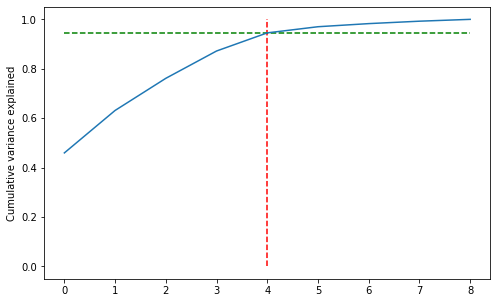

In [40]:
fig = plt.figure(figsize=[8, 5])
plt.vlines(x = 4,     ymax = 1, ymin = 0, colors = "r", linestyle = '--')
plt.hlines(y = 0.945, xmax = 8, xmin = 0, colors = "g", linestyle = '--')
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

94.5% of the variance is explained by 5 principal components.

### 5.4. Creating Principal Components for the Data

In [41]:
pca = PCA(n_components = 5, random_state=42)

In [42]:
data = pca.fit_transform(df_scaled)

In [43]:
data = pd.DataFrame(data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

(5.0, 0.0)

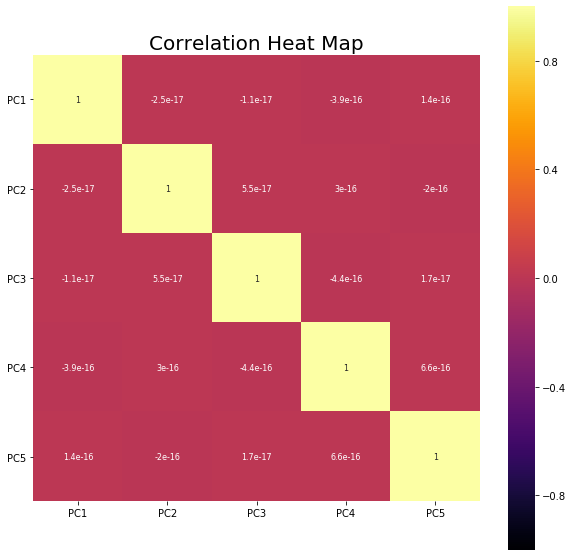

In [44]:
f, ax = plt.subplots(figsize=(10, 10))

heatmap = sns.heatmap(data.corr(), square = True, vmin = -1, vmax = 1,
                      cmap = 'inferno', annot = True, annot_kws = {"size": 8})

# add the column names as labels
ax.set_yticklabels(data.columns, rotation = 0)
ax.set_xticklabels(data.columns)

# add title to the plot
ax.set_title('Correlation Heat Map', fontsize = 20)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

# due to a bug in seaborn the first and last row square are getting cut in half - the following code fixes it
bottom, top = ax.get_ylim(); ax.set_ylim(bottom + 0.5, top - 0.5)

We can see from the heat map that __the principal components are non correlated__.

In [45]:
data.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007


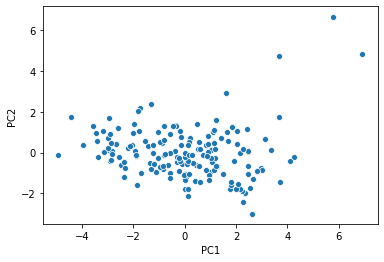

In [46]:
sns.scatterplot(data = data, x = 'PC1', y = 'PC2')

### 5.5. Hopkins Statistics

In [47]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [48]:
hopkins(data)

0.8027911731099671

__Since the value is > 0.7 the given dataset has a good tendency to form clusters.__

## 6. K-means Clustering

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### 6.1. Finding the Optimal Number of Clusters

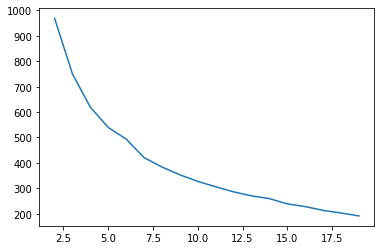

In [50]:
# Method 1: Elbow Curve

x = list(range(2, 20))
y = []

for n in x:
    
    kmeans = KMeans(n_clusters = n, max_iter = 50, random_state = 100)
    kmeans.fit(data)
    y.append(kmeans.inertia_)
    
plt.plot(x, y)

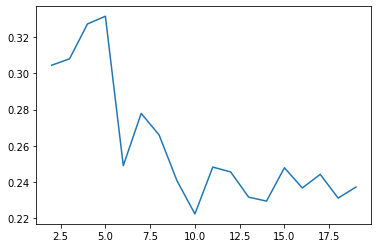

In [51]:
# Method 2: Silhouette Analysis

x = list(range(2, 20))
y = []

for n in x:
    
    kmeans = KMeans(n_clusters = n, max_iter = 50, random_state = 100)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(data, cluster_labels)
    y.append(silhouette_avg)
    
plt.plot(x, y)

Based on the above analysis we can consider the optimum number of clusters to be 4 or 5. But when we do with 5 clusters, there is only one country getting into a fifth cluster. So we will choose to create only 4 clusters.

### 6.2. Create the Clusters 

In [52]:
kmeans = KMeans(n_clusters = 4, max_iter = 50, random_state = 100)

In [53]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [54]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 0,
       1, 3, 1, 0, 0, 1, 0, 3, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 3, 1,
       3, 1, 1, 1, 1, 0, 0, 1, 1, 3, 3, 0, 0, 1, 3, 0, 3, 1, 1, 0, 0, 1,
       0, 1, 3, 1, 1, 1, 0, 3, 3, 3, 1, 3, 1, 1, 0, 0, 3, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       3, 3, 0, 0, 3, 1, 0, 1, 1, 1, 1, 1, 3, 3, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 3, 1, 0, 3, 3, 1, 1, 0, 1, 3, 3, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 3, 3, 3, 1, 1, 1, 1, 1, 0, 0])

In [55]:
pltdata1 = pd.concat([df['country'], data['PC1'], data['PC2']], axis = 1)

In [56]:
pltdata1['cluster'] = kmeans.labels_

In [57]:
pltdata1['cluster'].value_counts()

1    87
0    47
3    30
2     3
Name: cluster, dtype: int64

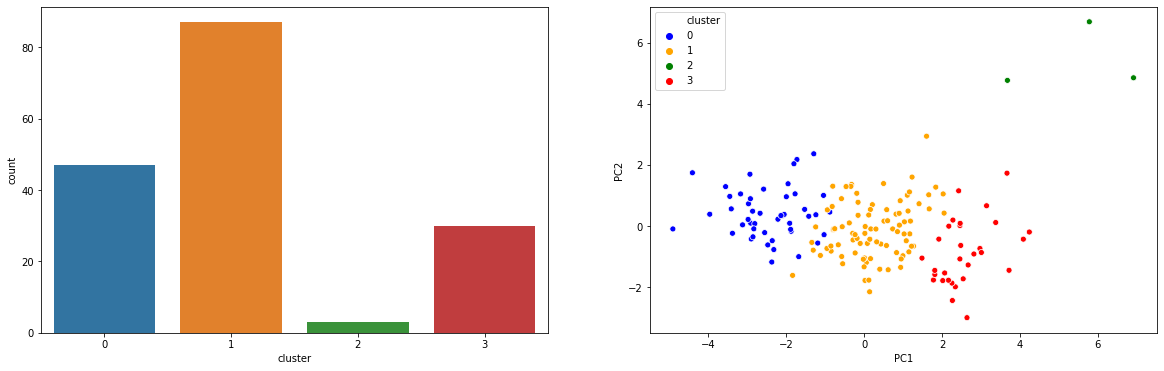

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.countplot(data = pltdata1, x = 'cluster', ax = axes[0])
sns.scatterplot(data = pltdata1, x = 'PC1', y = 'PC2', hue = 'cluster', ax = axes[1], 
                palette = ['blue', 'orange', 'green', 'red'])

plt.show()

 - __Cluster 0:__ Blue Dots - Under Developed Countries
 - __Cluster 1:__ Orange Dots - Developing Countries (China, Russia, Malaysia, India and so on)
 - __Cluster 2:__ Green Dots - Some of the outliers (Luxembourg, Malta, Singapore)
 - __Cluster 3:__ Red Dots - Developed Countries (Norway, Switzerland, USA, Germany, Ireland, Australia and so on)

## 7. Hierarchical Clustering

In [59]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [60]:
# Hierarchical Clustering with Single Linkage

merge1 = linkage(data, method = "single", metric = 'euclidean')
merge2 = linkage(data, method = "complete", metric = 'euclidean')

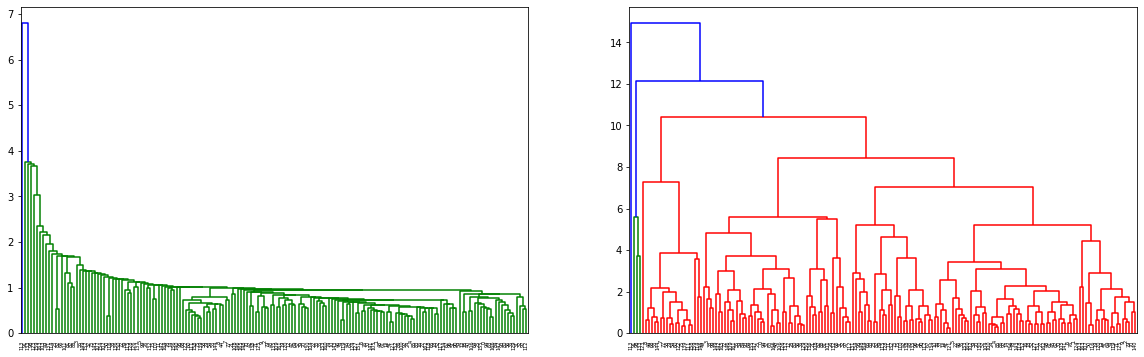

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

dendrogram(merge1, ax = axes[0])
dendrogram(merge2, ax = axes[1])
plt.show()

In [62]:
# The dendrogram created with complete linkage is much clearer and we will create clusters based on that.

cluster_labels = cut_tree(merge2, n_clusters = 5).reshape(-1, )

In [63]:
pltdata2 = pd.concat([df['country'], data['PC1'], data['PC2']], axis = 1)

In [64]:
pltdata2['cluster'] = cluster_labels

In [65]:
pltdata2['cluster'].value_counts()

1    94
0    49
2    20
3     3
4     1
Name: cluster, dtype: int64

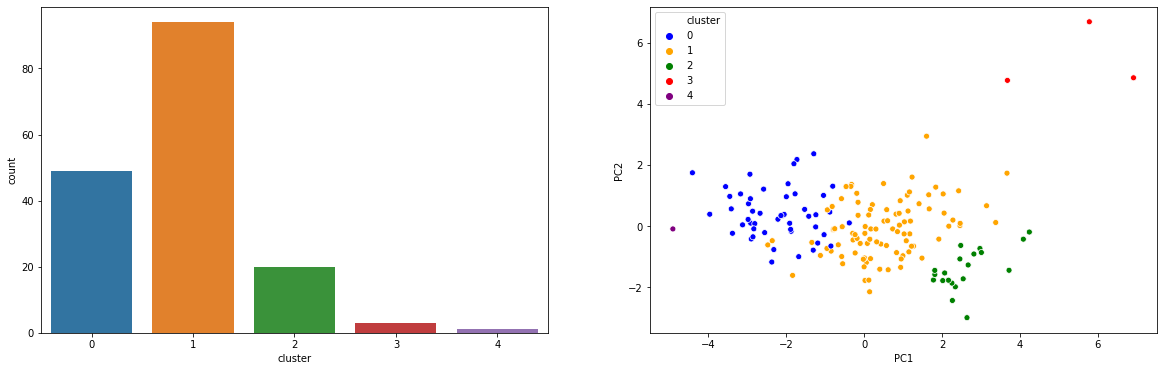

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.countplot(data = pltdata2, x = 'cluster', ax = axes[0])
sns.scatterplot(data = pltdata2, x = 'PC1', y = 'PC2', hue = 'cluster', ax = axes[1], 
                palette = ['blue', 'orange', 'green', 'red', 'purple'])

plt.show()

## 8. Cluster Analysis

For further analysis we will choose the result of the K-means clustering. 

We will assign those cluster ids to the original data so that we can visualize and interpret the clusters.

In [67]:
df['cluster'] = kmeans.labels_

In [68]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [69]:
df['cluster'].value_counts()

1    87
0    47
3    30
2     3
Name: cluster, dtype: int64

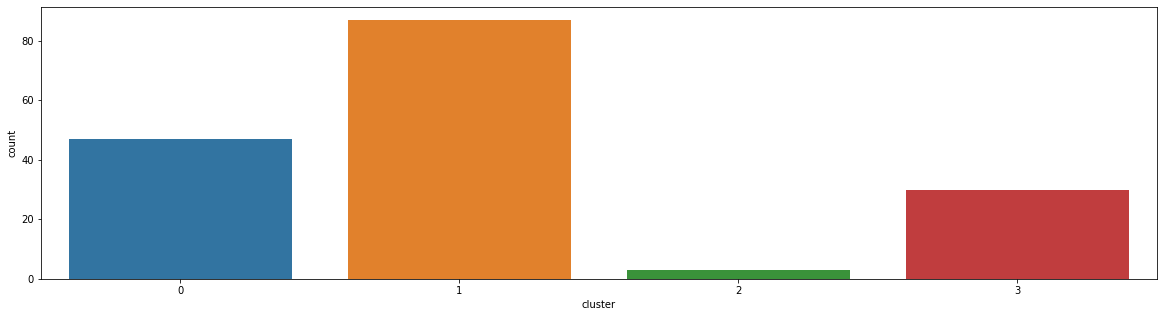

In [70]:
plt.figure(figsize = (20, 5))
sns.countplot(data = df, x = 'cluster')

### 8.1. Descriptive Statistics on Clusters

In [71]:
columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

In [72]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]
df3 = df[df['cluster'] == 3]

In [73]:
stat0 = df0.describe().T ; stat0['cluster'] = 0
stat1 = df1.describe().T ; stat1['cluster'] = 1
stat2 = df2.describe().T ; stat2['cluster'] = 2
stat3 = df3.describe().T ; stat3['cluster'] = 3

In [74]:
stat = pd.concat([stat0, stat1, stat2, stat3]).reset_index()

In [75]:
stat = stat[stat['index'].isin(columns)]

In [76]:
stat.rename(columns = {'index' : 'parameter', 'mean' : 'avg', 'count' : 'cnt' }, inplace = True)

In [77]:
stat = stat[['parameter', 'cluster', 'cnt', 'min', 'max', 'avg', 'std', '25%', '50%', '75%']]

In [78]:
stat.sort_values(by = ['parameter', 'cluster'])

,parameter,cluster,cnt,min,max,avg,std,25%,50%,75%
0,child_mort,0,47.0,36.9000,208.00,92.961702,33.375229,63.8000,90.200,111.0000
10,child_mort,1,87.0,3.4000,64.40,21.389655,13.821462,11.0000,18.100,27.7000
20,child_mort,2,3.0,2.8000,6.80,4.133333,2.309401,2.8000,2.800,4.8000
30,child_mort,3,30.0,2.6000,10.80,4.953333,2.159140,3.8250,4.200,5.1000
1,exports,0,47.0,2.2000,85.80,29.151277,18.160597,16.9500,23.800,38.2000
11,exports,1,87.0,0.1090,93.80,41.290678,19.523129,26.9000,37.700,52.0500
21,exports,2,3.0,153.0000,200.00,176.000000,23.515952,164.0000,175.000,187.5000
31,exports,3,30.0,12.4000,103.00,45.826667,21.736255,28.4250,44.250,63.5750
8,gdpp,0,47.0,231.0000,17100.00,1922.382979,2956.103925,550.0000,897.000,1470.0000
18,gdpp,1,87.0,592.0000,28000.00,6919.103448,5453.932294,2970.0000,5020.000,10500.0000


### 8.2. Visualizing the Clusters

In [79]:
# We will do these visualizations with respect to the following fields:

columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

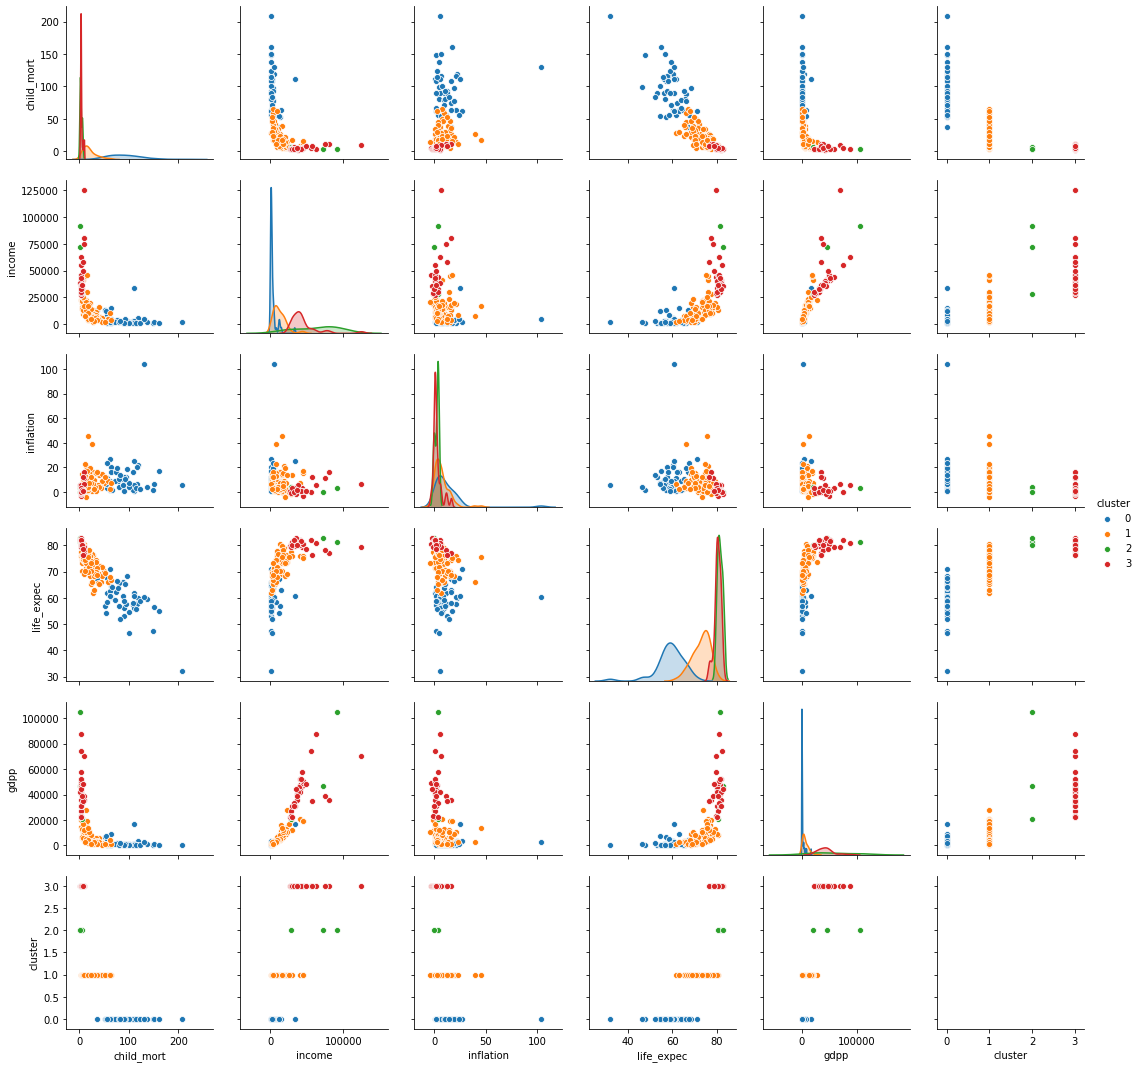

In [80]:
sns.pairplot(data = df[['child_mort', 'income', 'inflation', 'life_expec', 'gdpp', 'cluster']], hue = 'cluster')

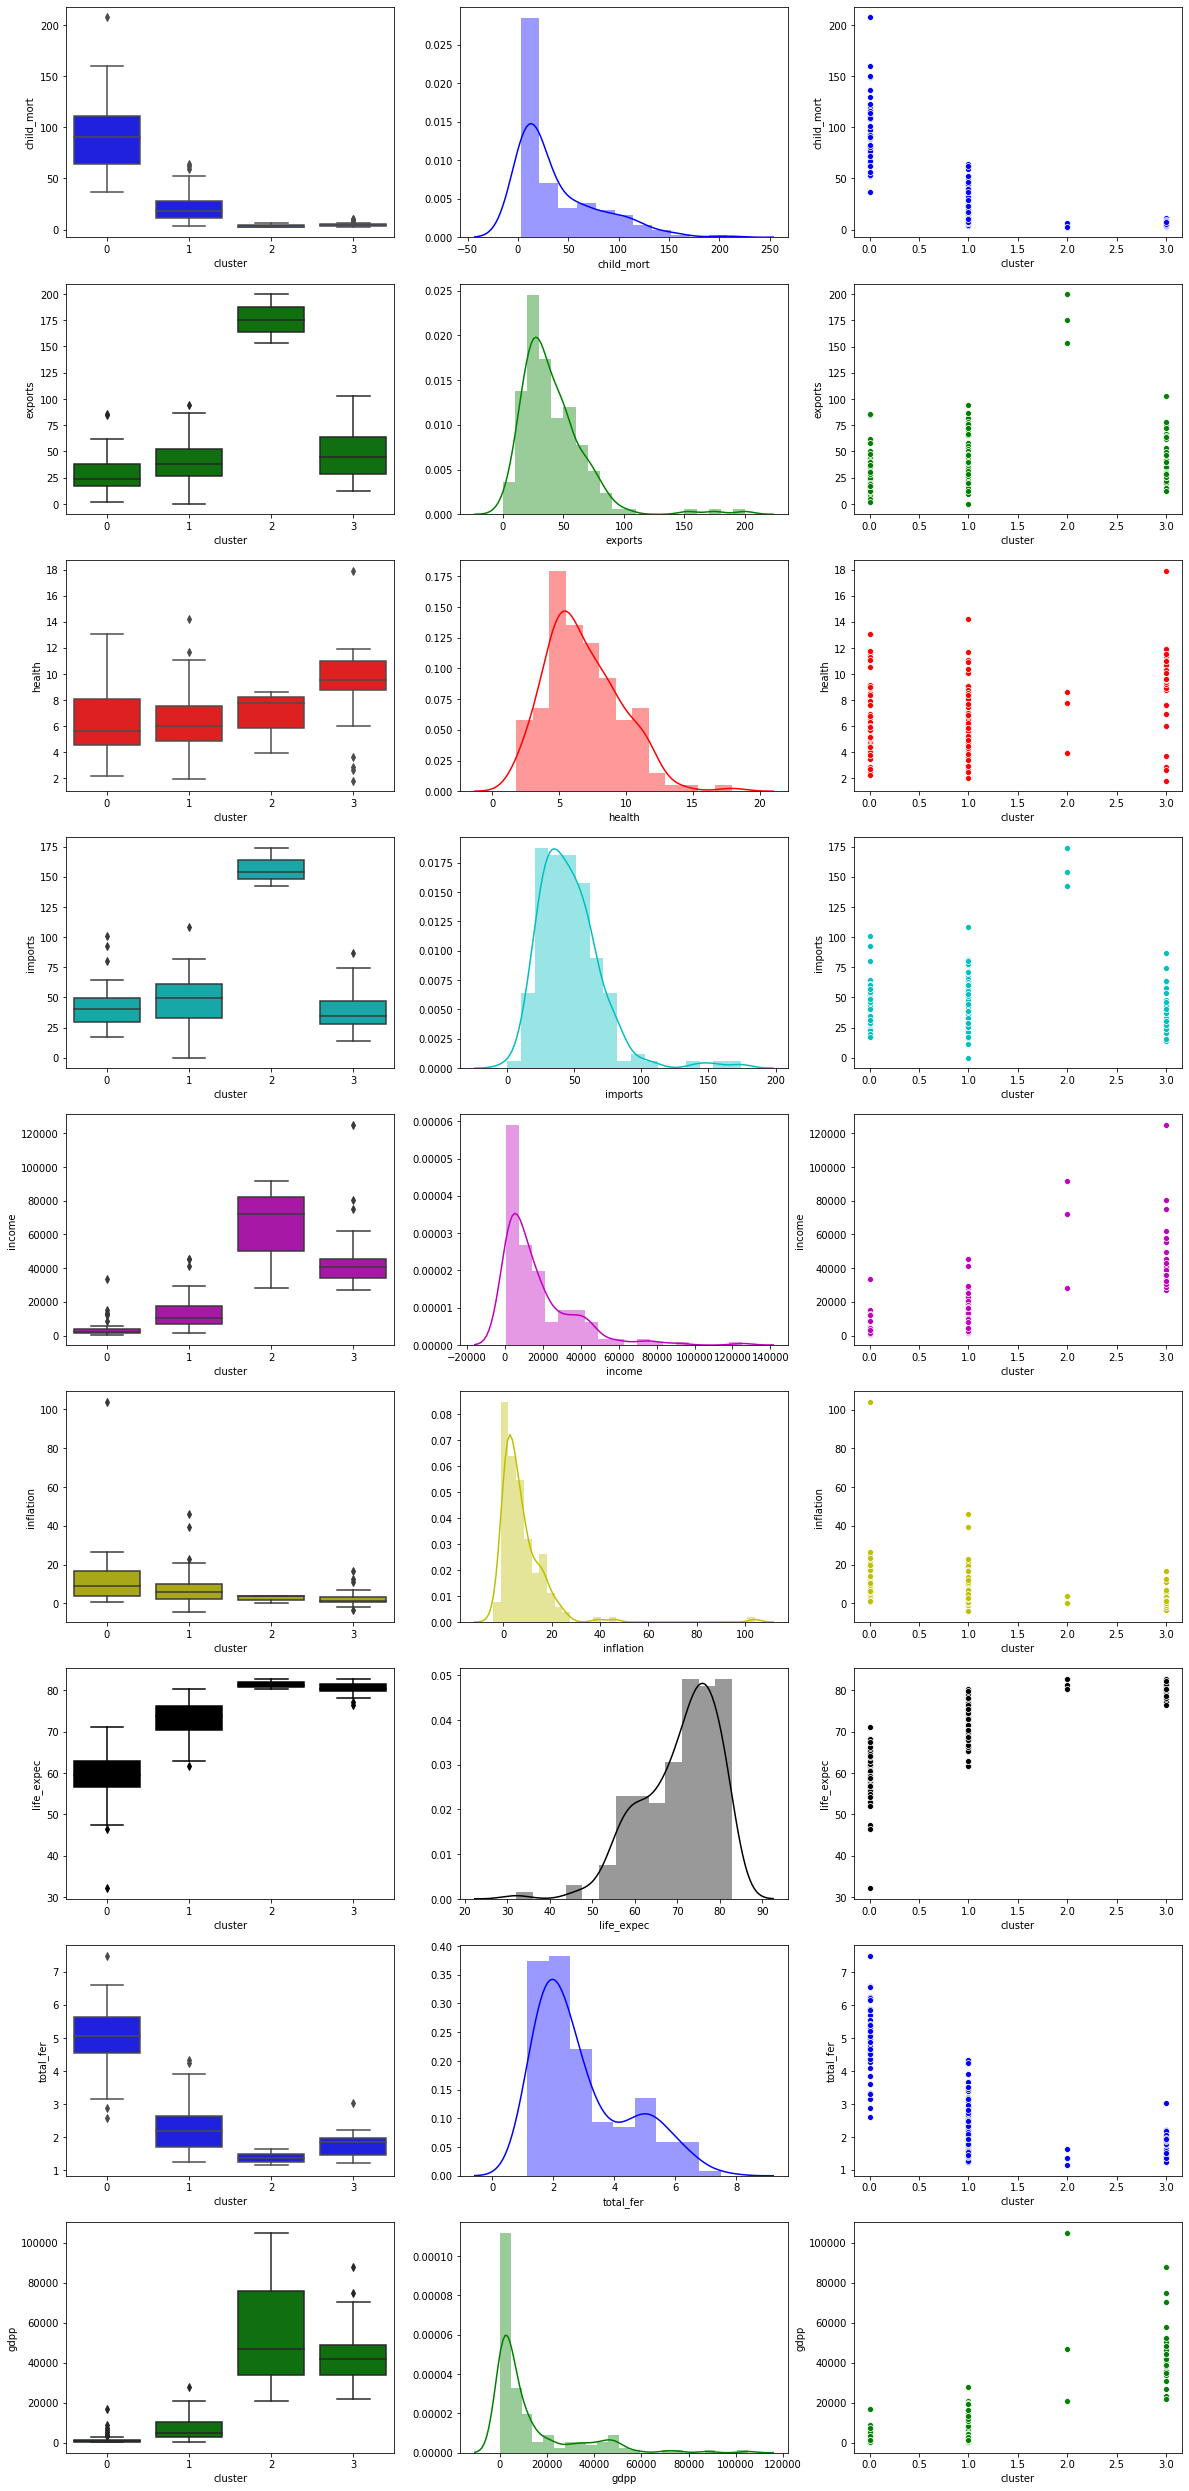

In [81]:
fig, axes = plt.subplots(9, 3, figsize=(20, 45))

i = 0; colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for col in columns:

    sns.boxplot(data = df, x = 'cluster', y = col, ax = axes[i][0], color = colors[i % 7])
    sns.distplot(df[col], hist = True, ax = axes[i][1], color = colors[i % 7])
    sns.scatterplot(data = df, x = 'cluster', y = col, ax = axes[i][2], color = colors[i % 7])
   
    i = i + 1
        
plt.show()

### 8.3. Interpreting the Clusters

From the above visualizations, we can see that, compared to other countries, the countries in cluster 0 have 

 - high child mortality rate, 
 - low life expectancy, 
 - low income and low gdpp, 
 - high inflation rate 

This is definitely a sign that these countries deserve more support and are in dire need for aid. These  are under-developed countries. 

We can clearly see that:

 - __Cluster 0:__ Under Developed Countries (47 countries)
 - __Cluster 1:__ Developing Countries (China, Russia, Malaysia, India and so on) (87 countries)
 - __Cluster 2:__ Some of the outliers (Luxembourg, Malta, Singapore - only 3 countries)
 - __Cluster 3:__ Developed Countries (Norway, Switzerland, USA, Germany, Ireland, Australia and so on) (30 countries)

#### What are the coutries in Cluster 0?

Since most of the parameters are expressed in terms of the gdpp of the country, we will consider gdpp to rank the countries in cluster 0 to come up with the list of most deserving country. As we have seen earlier, the income is also strongly correlated with gdpp.

In [82]:
df0.sort_values(by = ['gdpp', 'child_mort'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,0
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,0
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.790,60.8,4.60,413,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.640,54.5,5.56,419,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459,0
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.600,61.7,4.61,482,0


The countries which are having the dire need for an aid are: 
1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea